Output directory already exists: covid_ann_results
Results will be saved in: covid_ann_results
Loading dataset...
Dataset loaded: 37028 samples, 10 features
Class distribution: {1: 18514, 0: 18514}
Selected features: Breathing Problem, Sore throat, Running Nose, Chronic Lung Disease, Headache, Heart Disease, Diabetes, Hyper Tension, Attended Large Gathering, Gastrointestinal 

Fold 1/10
Epoch 1/200
417/417 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9043 - loss: 0.2385 - val_accuracy: 0.9605 - val_loss: 0.1205
Epoch 2/200
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9618 - loss: 0.1010 - val_accuracy: 0.9565 - val_loss: 0.1216
Epoch 3/200
417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9682 - loss: 0.0869 - val_accuracy: 0.9616 - val_loss: 0.1030
Epoch 4/200
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9713 - loss: 0.0766 - val_accuracy: 0.9641 - val_loss: 0.1008
Epoch 5/200
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9750 - loss: 0.0727 - val_a

Final model saved to covid_ann_results\final_model.h5

FINAL SUMMARY

Model Architecture:


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 202,373 (790.52 KB)

 Trainable params: 67,457 (263.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 134,916 (527.02 KB)


Industry-Standard Parameters Used:
- Dropout rates: 0.3 (first layer), 0.5 (deeper layers)
- Learning rate: 0.001
- Batch size: 64
- Network architecture: 128-256-128-1 neurons
- Early stopping patience: 15 epochs
- Max epochs: 200

Average metrics across all folds:
accuracy: 0.9815 ± 0.0029
precision: 0.9923 ± 0.0036
recall: 0.9705 ± 0.0056
f1: 0.9813 ± 0.0030
mcc: 0.9632 ± 0.0056
auc: 0.9985 ± 0.0003
fpr: 0.0075 ± 0.0034
specificity: 0.9925 ± 0.0034
lr_plus: 177.8120 ± 148.1546
lr_minus: 0.0297 ± 0.0056

All results and model saved to: covid_ann_results

Full path to output directory: C:\Users\aurok\covid_ann_results


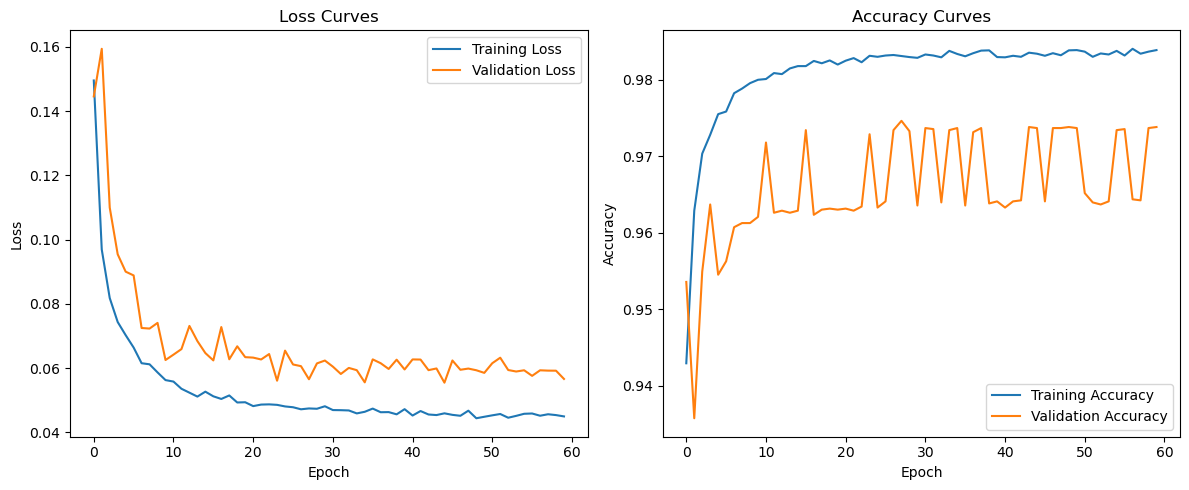

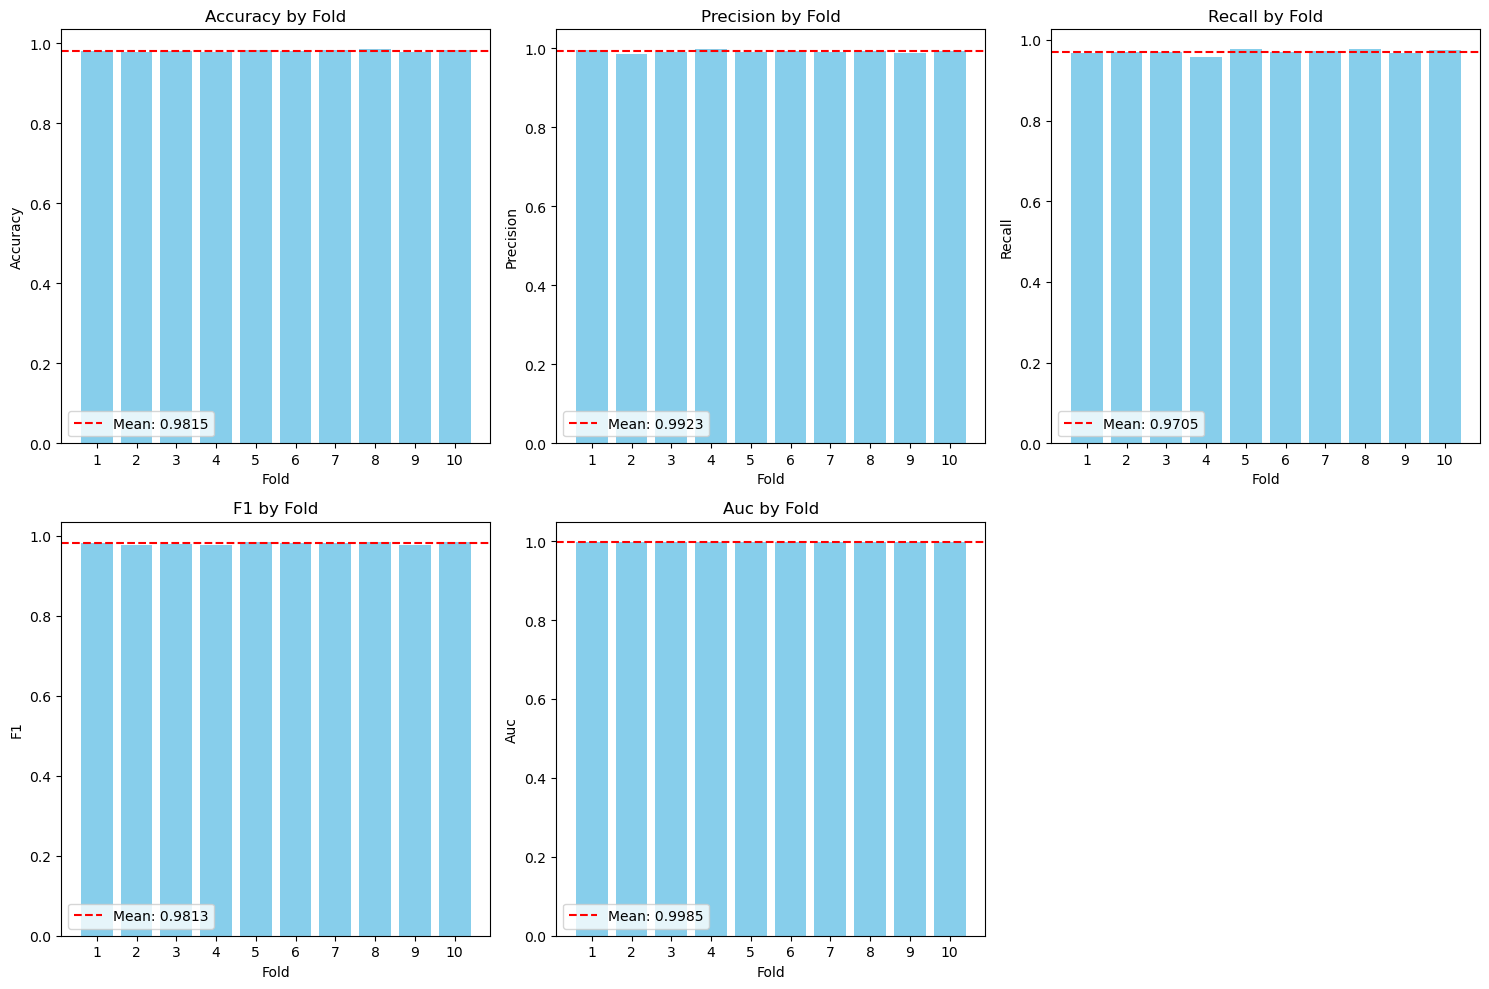

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, matthews_corrcoef
)
from keras.models import Sequential, save_model
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping
import tensorflow as tf

warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load dataset
def load_data(file_path):
    print("Loading dataset...")
    df = pd.read_csv(file_path)
    
    # Use only the specified features
    selected_features = [
        'Breathing Problem', 'Sore throat', 'Running Nose', 'Chronic Lung Disease',
        'Headache', 'Heart Disease', 'Diabetes', 'Hyper Tension', 'Attended Large Gathering', 'Gastrointestinal '
    ]
    
    # Check if all selected features are in the dataframe
    missing_features = [f for f in selected_features if f not in df.columns]
    if missing_features:
        raise ValueError(f"The following features are missing from the dataset: {missing_features}")
    
    X = df[selected_features].values.reshape(-1, 10, 1, 1)  # Reshape for ANN input
    y = df['COVID-19'].values
    
    print(f"Dataset loaded: {X.shape[0]} samples, {X.shape[1]} features")
    print(f"Class distribution: {dict(pd.Series(y).value_counts())}")
    print(f"Selected features: {', '.join(selected_features)}")
    
    return X, y

# Build the ANN model with industry-standard parameters
def create_ann_model():
    # Industry-standard parameters
    dropout1 = 0.3  # Standard dropout rate for first layer
    dropout2 = 0.5  # Higher dropout for deeper layers
    
    model = Sequential([
        Flatten(input_shape=(10, 1, 1)),  # Flatten the input
        Dense(128, activation='relu'),  # First hidden layer with more neurons
        Dropout(dropout1),
        Dense(256, activation='relu'),  # Second hidden layer with more capacity
        Dropout(dropout2),
        Dense(128, activation='relu'),  # Additional layer for better feature extraction
        Dropout(dropout2),
        Dense(1, activation='sigmoid')  # Output layer
    ])
    
    # Industry-standard optimizer settings
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Calculate additional metrics
def calculate_metrics(y_true, y_pred, y_pred_proba):
    # Basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    
    # AUC-ROC
    try:
        roc_auc = roc_auc_score(y_true, y_pred_proba)
    except:
        roc_auc = 0.5
    
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # False Positive Rate
    fpr = fp / (fp + tn)
    
    # Likelihood Ratios
    sensitivity = recall
    specificity = tn / (tn + fp)
    lr_plus = sensitivity / (1 - specificity) if (1 - specificity) > 0 else float('inf')
    lr_minus = (1 - sensitivity) / specificity if specificity > 0 else float('inf')
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'mcc': mcc,
        'auc': roc_auc,
        'fpr': fpr,
        'specificity': specificity,
        'lr_plus': lr_plus,
        'lr_minus': lr_minus
    }

# Create output directory
def create_output_directory():
    # Create a local directory for outputs
    output_dir = "covid_ann_results"
    
    # Create the directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created output directory: {output_dir}")
    else:
        print(f"Output directory already exists: {output_dir}")
    
    return output_dir

def main():
    # Create output directory
    output_dir = create_output_directory()
    print(f"Results will be saved in: {output_dir}")
    
    # Load data - using your local path
    file_path = "OneDrive/Desktop/Research_Capstone_Project/preprocessed_covid500_final.csv"
    X, y = load_data(file_path)
    
    # 10-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Store results
    all_metrics = []
    all_fold_histories = []
    
    # For each fold
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        print(f"\nFold {fold+1}/10")
        print("="*50)
        
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Create model with industry-standard parameters
        model = create_ann_model()
        
        # Early stopping callback with industry-standard settings
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=15,  # More patience for better convergence
            verbose=1,
            mode='min',
            restore_best_weights=True
        )
        
        # Train the model with industry-standard settings
        history = model.fit(
            X_train, y_train,
            epochs=200,  # Higher max epochs with early stopping
            batch_size=64,  # Larger batch size for better stability
            validation_split=0.2,
            callbacks=[early_stopping],
            verbose=1
        )
        
        all_fold_histories.append(history.history)
        
        # Generate predictions
        y_pred_proba = model.predict(X_test).flatten()
        y_pred = (y_pred_proba > 0.5).astype(int)
        
        # Calculate metrics
        fold_metrics = calculate_metrics(y_test, y_pred, y_pred_proba)
        all_metrics.append(fold_metrics)
        
        # Print metrics for this fold
        print(f"\nMetrics for fold {fold+1}:")
        for metric, value in fold_metrics.items():
            print(f"{metric}: {value:.4f}")
        
        # Removed the individual fold model saving
    
    # Train final model on the entire dataset
    print("\nTraining final model on entire dataset...")
    final_model = create_ann_model()
    
    # Train the final model
    final_early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        verbose=1,
        mode='min',
        restore_best_weights=True
    )
    
    final_history = final_model.fit(
        X, y,
        epochs=200,
        batch_size=64,
        verbose=1,
        validation_split=0.2,
        callbacks=[final_early_stopping]
    )
    
    # Save only the final model
    model_path = os.path.join(output_dir, "final_model.h5")
    save_model(final_model, model_path)
    print(f"Final model saved to {model_path}")
    
    # Calculate and print average metrics
    metrics_df = pd.DataFrame(all_metrics)
    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()
    
    # Print final summary
    print("\n" + "="*50)
    print("FINAL SUMMARY")
    print("="*50)
    
    print("\nModel Architecture:")
    final_model.summary()
    
    print("\nIndustry-Standard Parameters Used:")
    print("- Dropout rates: 0.3 (first layer), 0.5 (deeper layers)")
    print("- Learning rate: 0.001")
    print("- Batch size: 64")
    print("- Network architecture: 128-256-128-1 neurons")
    print("- Early stopping patience: 15 epochs")
    print("- Max epochs: 200")
    
    print("\nAverage metrics across all folds:")
    for metric in metrics_df.columns:
        print(f"{metric}: {avg_metrics[metric]:.4f} ± {std_metrics[metric]:.4f}")
    
    # Save metrics to CSV
    metrics_df.to_csv(os.path.join(output_dir, "all_fold_metrics.csv"), index=False)
    
    # Save summary metrics
    summary_df = pd.DataFrame({
        'Metric': metrics_df.columns,
        'Mean': avg_metrics.values,
        'Std': std_metrics.values
    })
    summary_df.to_csv(os.path.join(output_dir, "summary_metrics.csv"), index=False)
    
    # Plot training history for final model
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(final_history.history['loss'], label='Training Loss')
    plt.plot(final_history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(final_history.history['accuracy'], label='Training Accuracy')
    plt.plot(final_history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "training_history.png"))
    
    # Create a fold comparison plot
    plt.figure(figsize=(15, 10))
    
    # Plot metrics across folds
    metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'auc']
    for i, metric in enumerate(metrics_to_plot):
        plt.subplot(2, 3, i+1)
        plt.bar(range(1, 11), metrics_df[metric], color='skyblue')
        plt.axhline(avg_metrics[metric], color='red', linestyle='--', label=f'Mean: {avg_metrics[metric]:.4f}')
        plt.title(f'{metric.capitalize()} by Fold')
        plt.xlabel('Fold')
        plt.ylabel(metric.capitalize())
        plt.xticks(range(1, 11))
        plt.legend()
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "fold_comparison.png"))
    
    print(f"\nAll results and model saved to: {output_dir}")
    print(f"\nFull path to output directory: {os.path.abspath(output_dir)}")

if __name__ == "__main__":
    main()